In [1]:
library(rEDM)
library(tidyverse)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
oromia_crops<-read_csv('/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_cropland.csv')
oromia_crops_smoothed<-read_csv('/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_crops_smoothed.csv')

Parsed with column specification:
cols(
  DT = col_date(format = ""),
  SM = col_double(),
  TMP = col_double(),
  P = col_double(),
  LST = col_double(),
  NDVI = col_double(),
  PET = col_double()
)
Parsed with column specification:
cols(
  DT = col_date(format = ""),
  SM = col_double(),
  TMP = col_double(),
  P = col_double(),
  LST = col_double(),
  NDVI = col_double(),
  PET = col_double()
)


In [3]:
head(oromia_crops)

DT,SM,TMP,P,LST,NDVI,PET
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2002-07-01,0.2875267,24.73324,50.30155,31.82737,145.8734,42.68001
2002-07-11,0.3163823,23.24023,52.73784,27.77670,146.6016,36.70754
2002-07-21,0.3501470,22.08087,93.41723,26.17568,147.2122,40.16462
2002-08-01,0.3652579,21.78833,67.46168,25.14131,150.4393,34.16302
2002-08-11,0.3676845,22.03248,66.04284,25.14131,156.2379,35.40541
2002-08-21,0.3668184,22.72724,72.80215,26.19253,163.1599,41.59370


In [4]:
head(oromia_crops_smoothed)

DT,SM,TMP,P,LST,NDVI,PET
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2002-07-01,0.3087101,23.45195,55.50608,24.92183,145.8734,39.27415
2002-07-11,0.3216859,23.15844,55.76522,25.41115,146.6016,38.95641
2002-07-21,0.3335710,22.90439,55.33212,25.91001,147.2122,38.74130
2002-08-01,0.3446920,22.66960,54.33887,26.41592,150.4393,38.60292
2002-08-11,0.3553551,22.44309,54.00195,26.92588,156.2379,38.49335
2002-08-21,0.3561691,22.50065,50.60848,27.43708,163.1599,39.16098


In [5]:
#organize the data
#need to normalize the data
# normalize <- function(x) {
#     (x - mean(x))/sd(x)
# }

#separate time column from data
vars <- colnames(oromia_crops_smoothed[2:7])
vars_ts<-oromia_crops_smoothed[,vars]

In [6]:
#normalize each time series within a plot

normalized_data <- scale(vars_ts)
DT <- as.Date(oromia_crops_smoothed$DT, format = "%y/%m/%d")
composite_ts <- cbind(data.frame(DT), data.frame(normalized_data))

In [7]:
normalized_data

SM,TMP,P,LST,NDVI,PET
0.5008764,-1.033377797,1.3206176,-1.9677048,-0.08568219,-0.54857486
0.7045877,-1.280508066,1.3326748,-1.8231168,-0.02683906,-0.60900385
0.8911754,-1.494404909,1.3125236,-1.6757082,0.02249627,-0.64991124
1.0657686,-1.692098178,1.2663108,-1.5262149,0.28324587,-0.67622937
1.2331720,-1.882807171,1.2506350,-1.3755250,0.75178284,-0.69706756
1.2459514,-1.834346579,1.0927468,-1.2244689,1.31108335,-0.57009740
1.1222665,-1.641484829,0.7299915,-1.0737100,1.74151954,-0.30962448
0.8818905,-1.371737838,0.2763633,-0.9236984,1.90129906,0.05641922
0.5676127,-1.095010406,-0.1450437,-0.7745239,1.89809644,0.39681966
0.2074656,-0.805540021,-0.4717638,-0.6255622,1.68089088,0.64868315


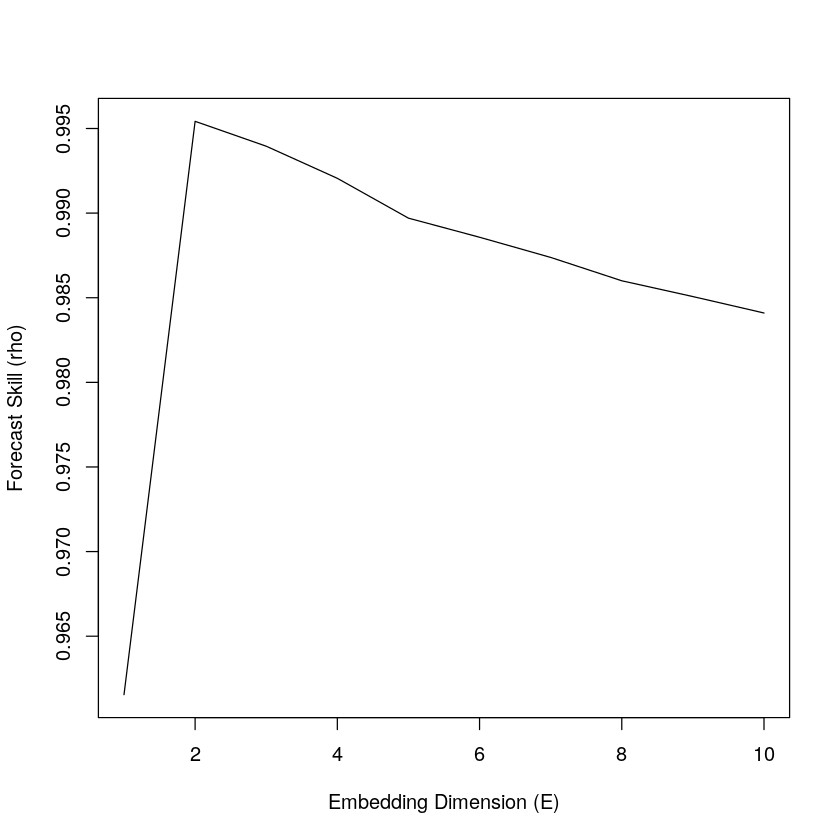

In [8]:
#png('ndvi_simplex.png')
ts_ndvi <- composite_ts$NDVI
lib <- c(1, length(ts_ndvi))
pred <- c(1, length(ts_ndvi))
simplex_output <- simplex(ts_ndvi, lib, pred, silent = TRUE)
plot(simplex_output$E, simplex_output$rho, type = "l",
     xlab = "Embedding Dimension (E)", ylab = "Forecast Skill (rho)")
#dev.off()

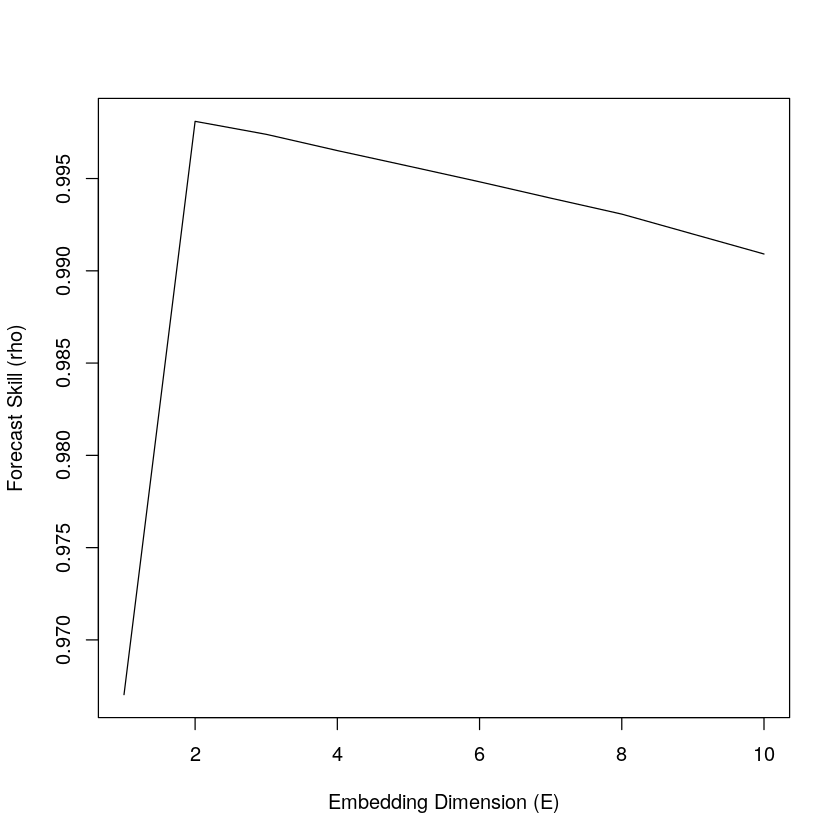

In [9]:
#png('ndvi_simplex.png')
ts_sm <- composite_ts$SM
lib <- c(1, length(ts_sm))
pred <- c(1, length(ts_sm))
simplex_output_sm <- simplex(ts_sm, lib, pred, silent = TRUE)
plot(simplex_output_sm$E, simplex_output_sm$rho, type = "l",
     xlab = "Embedding Dimension (E)", ylab = "Forecast Skill (rho)")

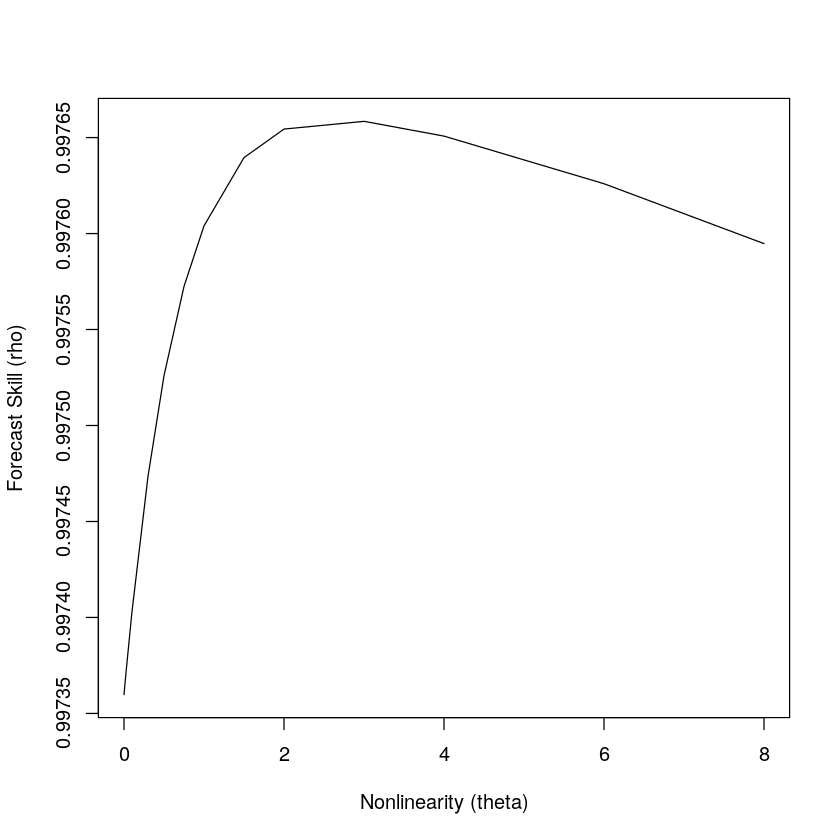

In [10]:
smap_output<- s_map(ts_ndvi, lib, pred, E = 2, silent = TRUE)
plot(smap_output$theta, smap_output$rho, type = "l", xlim = c(0, 8),
     xlab = "Nonlinearity (theta)", ylab = "Forecast Skill (rho)")

In [11]:
n <- NROW(composite_ts)
ccm_rho_matrix <- matrix(NA, nrow = length(vars), ncol = length(vars),
                     dimnames = list(vars, vars))

for (ccm_from in vars)
{
    for (ccm_to in vars[vars != ccm_from])
    {
        out_temp <- ccm(composite_ts, E = 2,
                        lib_column = ccm_from, target_column = ccm_to,
                        lib_sizes = n, replace = FALSE, silent = TRUE)
        ccm_rho_matrix[ccm_from, ccm_to] <- out_temp$rho
    }
}

In [12]:
corr_matrix <- array(NA, dim = c(length(vars), length(vars)),
                     dimnames = list(vars, vars))

for (ccm_from in vars)
{
    for (ccm_to in vars[vars != ccm_from])
    {
        cf_temp <- ccf(composite_ts[, ccm_from], composite_ts[, ccm_to],
                       type = "correlation", lag.max = 6, plot = FALSE)$acf
        corr_matrix[ccm_from, ccm_to] <- max(abs(cf_temp))
    }
}

In [13]:
ccm_rho_matrix

,SM,TMP,P,LST,NDVI,PET
SM,NA,0.9039607,0.9704958,0.9479784,0.9621966,0.8451169
TMP,0.8344963,NA,0.8533304,0.8661890,0.8083061,0.8254070
P,0.9791237,0.8692316,NA,0.9384178,0.9529978,0.7739306
LST,0.9665084,0.8904348,0.9263117,NA,0.9362897,0.8662238
NDVI,0.9321588,0.8282666,0.8719056,0.9290287,NA,0.7776255
PET,0.7917571,0.8238063,0.8390433,0.8175822,0.6808941,NA


In [14]:
corr_matrix

,SM,TMP,P,LST,NDVI,PET
SM,NA,0.8007868,0.9669239,0.9341903,0.9601538,0.7420991
TMP,0.8007868,NA,0.7561912,0.8965069,0.7853456,0.8719020
P,0.9669239,0.7561912,NA,0.8837182,0.9377899,0.6764259
LST,0.9341903,0.8965069,0.8837182,NA,0.9097809,0.8502839
NDVI,0.9601538,0.7853456,0.9377899,0.9097809,NA,0.7251324
PET,0.7420991,0.8719020,0.6764259,0.8502839,0.7251324,NA


In [15]:
ndvi_xmap_precip <- ccm(composite_ts, E = 2, random_libs = TRUE,
                        lib_column = "NDVI", target_column = "P",
                        lib_sizes = seq(0, 300, by = 5),
                        silent = TRUE)
precip_xmap_ndvi <- ccm(composite_ts, E = 2, random_libs = TRUE,
                        lib_column = "P", target_column = "NDVI",
                        lib_sizes = seq(0, 300, by = 5),
                        silent = TRUE)

ndvi_xmap_precip_means<- ccm_means(ndvi_xmap_precip)
precip_xmap_ndvi_means<- ccm_means(precip_xmap_ndvi)

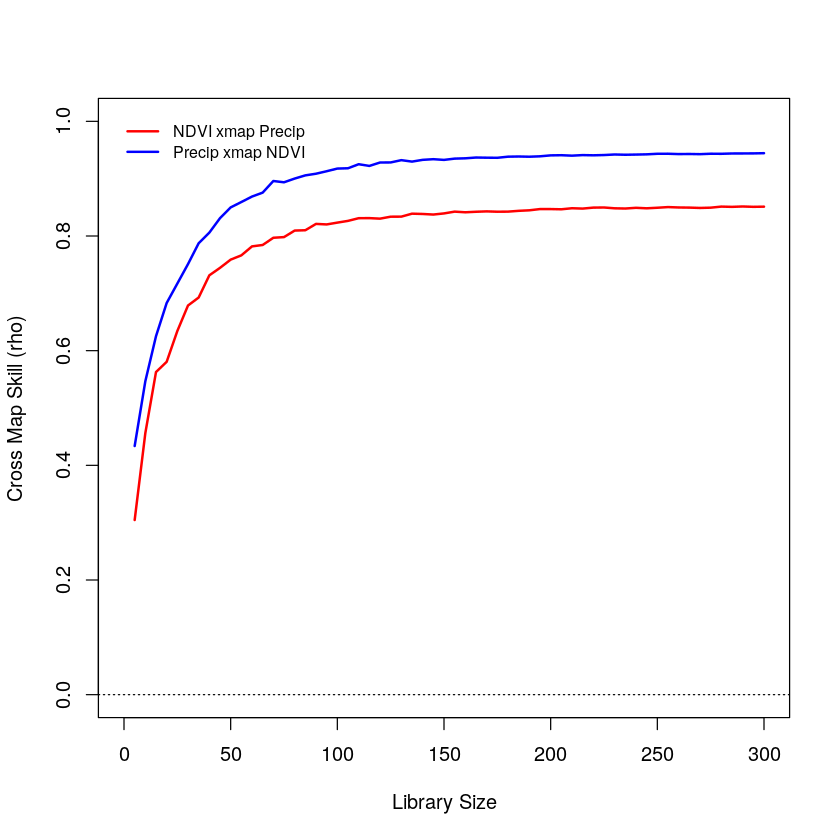

In [16]:
#png('ccm_ndvi_precip_oromia_crops.png')
plot(ndvi_xmap_precip_means$lib_size, pmax(0, ndvi_xmap_precip_means$rho), type = "l",
     xlab = "Library Size", ylab = "Cross Map Skill (rho)",
     col = "red", xlim = c(0, 300), ylim = c(0, 1), lwd = 2)
lines(precip_xmap_ndvi_means$lib_size, pmax(0,  precip_xmap_ndvi_means$rho),
      col = "blue", lwd = 2)
legend(x = "topleft", col = c("red", "blue"), lwd = 2,
       legend = c("NDVI xmap Precip",
                  "Precip xmap NDVI"),
       inset = 0.02, bty = "n", cex = 0.8)

abline(h = 0, lty = 3)
#dev.off()

In [17]:
ndvi_xmap_pet <- ccm(composite_ts, E = 2, random_libs = TRUE,
                        lib_column = "NDVI", target_column = "PET",
                        lib_sizes = seq(0, 300, by = 5),
                        silent = TRUE)
pet_xmap_ndvi <- ccm(composite_ts, E = 2, random_libs = TRUE,
                        lib_column = "PET", target_column = "NDVI",
                        lib_sizes = seq(0, 300, by = 5),
                        silent = TRUE)

ndvi_xmap_pet_means<- ccm_means(ndvi_xmap_pet)
pet_xmap_ndvi_means<- ccm_means(pet_xmap_ndvi)

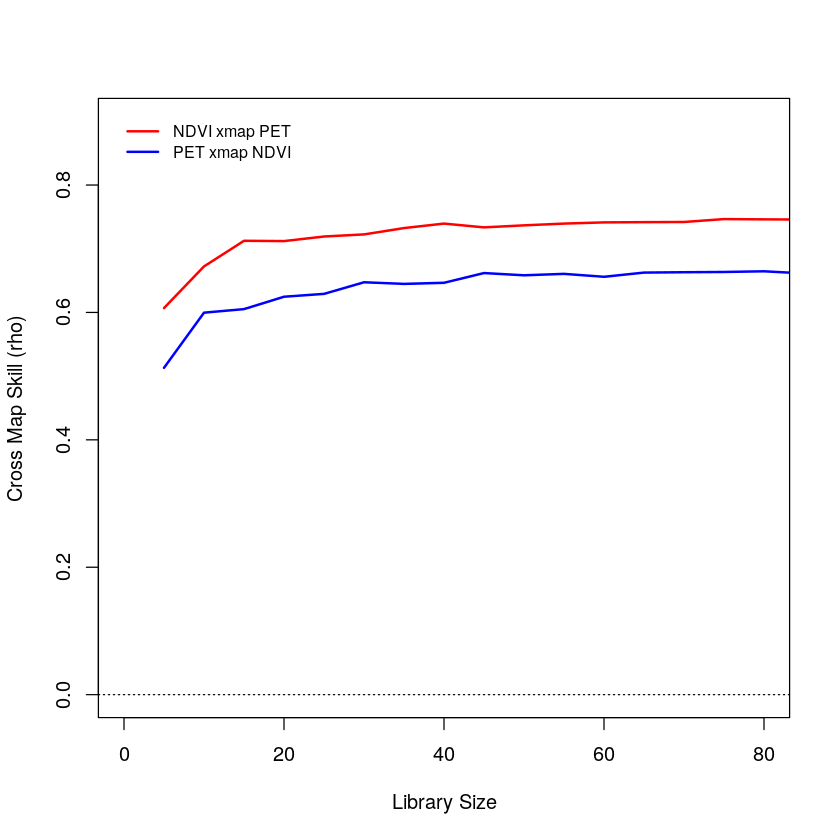

In [18]:
#png('ccm_ndvi_et_oromia_crops.png')
plot(ndvi_xmap_pet_means$lib_size, pmax(0, ndvi_xmap_pet_means$rho), type = "l",
     xlab = "Library Size", ylab = "Cross Map Skill (rho)",
     col = "red", xlim = c(0, 80), ylim = c(0, 0.9), lwd = 2)
lines(pet_xmap_ndvi_means$lib_size, pmax(0,  pet_xmap_ndvi_means$rho),
      col = "blue", lwd = 2)
legend(x = "topleft", col = c("red", "blue"), lwd = 2,
       legend = c("NDVI xmap PET",
                  "PET xmap NDVI"),
       inset = 0.02, bty = "n", cex = 0.8)

abline(h = 0, lty = 3)
#dev.off()

In [19]:
ndvi_xmap_sm <- ccm(composite_ts, E = 2, random_libs = TRUE,
                        lib_column = "NDVI", target_column = "SM",
                        lib_sizes = seq(0, 300, by = 5),
                        silent = TRUE)
sm_xmap_ndvi <- ccm(composite_ts, E = 2, random_libs = TRUE,
                        lib_column = "SM", target_column = "NDVI",
                        lib_sizes = seq(0, 300, by = 5),
                        silent = TRUE)

ndvi_xmap_sm_means<- ccm_means(ndvi_xmap_sm)
sm_xmap_ndvi_means<- ccm_means(sm_xmap_ndvi)

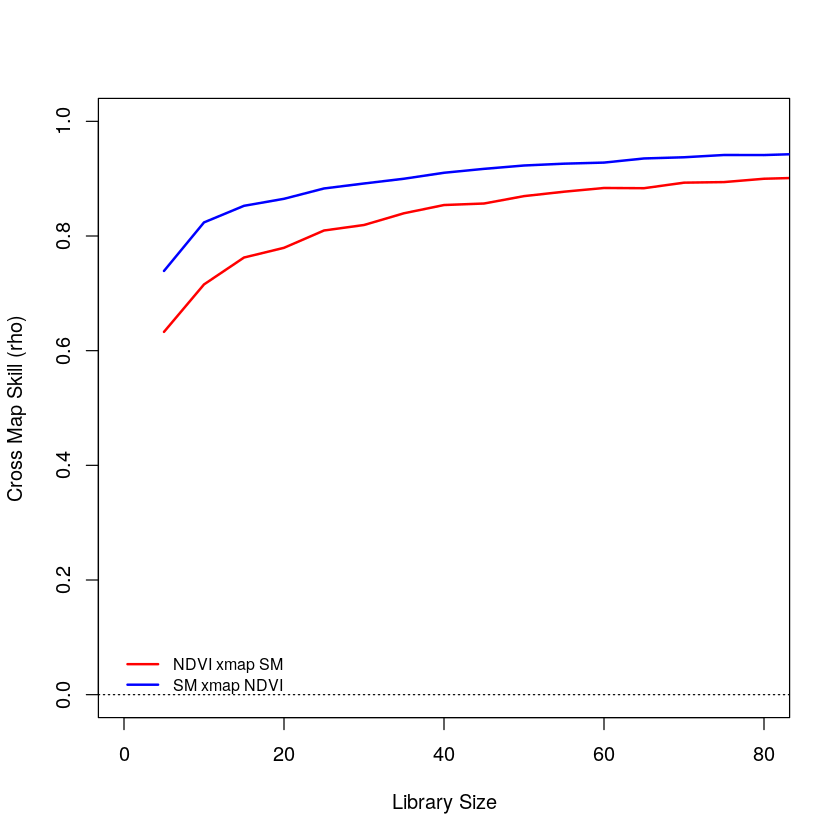

In [20]:
#png('ccm_ndvi_sm_oromia_crops.png')
plot(ndvi_xmap_sm_means$lib_size, pmax(0, ndvi_xmap_sm_means$rho), type = "l",
     xlab = "Library Size", ylab = "Cross Map Skill (rho)",
     col = "red", xlim = c(0, 80), ylim = c(0, 1), lwd = 2)
lines(sm_xmap_ndvi_means$lib_size, pmax(0,  sm_xmap_ndvi_means$rho),
      col = "blue", lwd = 2)
legend(x = "bottomleft", col = c("red", "blue"), lwd = 2,
       legend = c("NDVI xmap SM",
                  "SM xmap NDVI"),
       inset = 0.02, bty = "n", cex = 0.8)

abline(h = 0, lty = 3)
#dev.off()

# Quantify time delays in causation

In [21]:
params<- names(composite_ts %>%
        select(NDVI, SM))

In [22]:
params_ts<-composite_ts %>%
select(DT, NDVI, SM)

In [23]:
#generate all combinations of lib_column, target_column, tp
params_expand <- expand.grid(lib_column = params,
                           target_column = params,
                          tp = -10:10)

In [24]:
#throw out cases where lib==target
params_expand <- params_expand[params_expand$lib_column != params_expand$target_column, ]

E<-2

In [25]:
params_expand

,lib_column,target_column,tp
,<fct>,<fct>,<int>
2,SM,NDVI,-10
3,NDVI,SM,-10
6,SM,NDVI,-9
7,NDVI,SM,-9
10,SM,NDVI,-8
11,NDVI,SM,-8
14,SM,NDVI,-7
15,NDVI,SM,-7
18,SM,NDVI,-6


In [26]:
output <- do.call(rbind, lapply(seq_len(NROW(params_expand)), function(i) {
    ccm(params_ts, E = 2, 
        lib_sizes = NROW(params_ts), random_libs = FALSE, 
        lib_column = params_expand$lib_column[i], 
        target_column = params_expand$target_column[i], 
        tp = params_expand$tp[i], silent = TRUE)
}))

In [27]:
output

E,tau,tp,nn,lib_column,target_column,lib_size,num_pred,rho,mae,rmse
<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,-10,3,SM,NDVI,512,512,0.8608448,0.3929917,0.5162126
2,1,-10,3,NDVI,SM,512,512,0.7992743,0.4190503,0.6131377
2,1,-9,3,SM,NDVI,513,513,0.8632517,0.3888021,0.5116226
2,1,-9,3,NDVI,SM,513,513,0.8285003,0.3941497,0.5702809
2,1,-8,3,SM,NDVI,514,514,0.8704491,0.3707140,0.4983994
2,1,-8,3,NDVI,SM,514,514,0.8634367,0.3612565,0.5123216
2,1,-7,3,SM,NDVI,515,515,0.8798440,0.3588457,0.4808010
2,1,-7,3,NDVI,SM,515,515,0.8985102,0.3242762,0.4445267
2,1,-6,3,SM,NDVI,516,516,0.8907132,0.3442710,0.4596477


In [28]:
output$direction <- paste(output$lib_column, "xmap to", output$target_column)

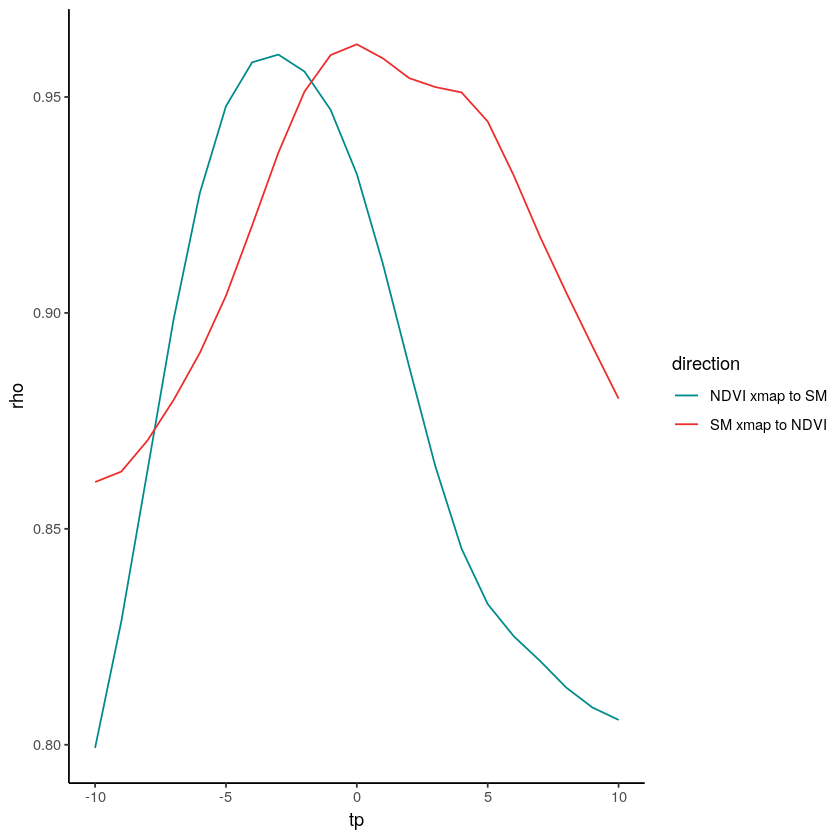

In [29]:
#png('time_delay_ndvi_sm_oromia_crops.png')
library(ggplot2)
time_delay <- ggplot(output, aes(x = tp, y = rho, color = direction)) + 
    geom_line() + theme_classic()

time_delay + scale_color_manual(values=c("darkcyan", "firebrick2"))
#dev.off()